In [1]:
import MuMoT.MuMoT as mmt # if working directly from git clone
#import MuMoT as mmt # if working with pip installed module

Created `%%model` as an alias for `%%latex`.


In [2]:
%%model
$
U -> A : g_1
U -> B : g_2
A -> U : a_1
B -> U : a_2
A + U -> A + A : r_1
B + U -> B + B : r_2
A + B -> A + U : s
A + B -> B + U : s
$

<IPython.core.display.Latex object>

In [3]:
model1 = mmt.parseModel(In[2])

In [4]:
model2 = model1.substitute('a_1 = 1/v_1, a_2 = 1/v_2, g_1 = v_1, g_2 = v_2, r_1 = v_1, r_2 = v_2')

In [5]:
model3 = model2.substitute('v_1 = \\mu + \\Delta/2, v_2 = \\mu - \\Delta/2')

In [6]:
model3.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
model3.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
model4 = model3.substitute('U = N - \A - \B')

In [9]:
model4.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

bar<ipywidgets.widgets.widget_string.HTML object at 0x114f7c828>


<IPython.core.display.Javascript object>


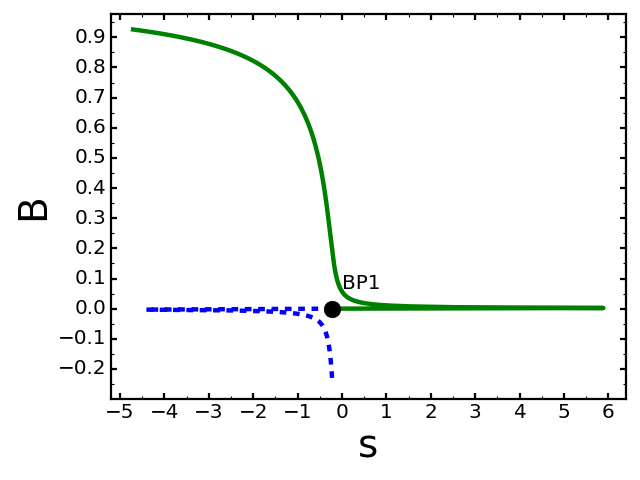

In [29]:
#modelBifCont1 = model4.bifurcation('s','A',plottingMethod='pyds')
modelBifCont1 = model4.bifurcation('s','B', initSV=[['A', 0.1], ['B', 0.9]], 
                                   fontsize=35, BifParInit =5, ContMaxNumPoints=450)

In [30]:
modelBifCont1.showLogs()

Initial conditions chosen for state variables:  {'B': 0.9, 'A': 0.1}
Starting bifurcation analysis with parameters (Delta=10.0), (mu=10.0), at 2017-10-07 08:08:28.690053
Not converged:  [-0.2683528   1.38734017  4.84568243] 

BP Point found 
Special Points on curve:  [[-0.23439834105785093], [1.0706077680670038e-14], ['BP1']]


<IPython.core.display.Javascript object>


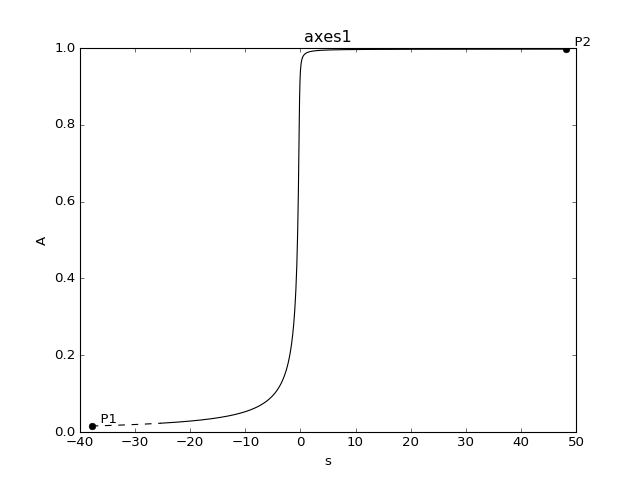

In [31]:
soloView0 = mmt.MuMoTbifurcationView(model4, None, 's', 'A', plottingMethod='pyds',
                                     params = [('\mu', 1), ('v', 2), ('\Delta', 0)])

In [10]:
model5 = model2.substitute('v_1 = v, v_2 = v')

In [11]:
model6 = model5.substitute('U = N - \A - \B')

In [12]:
model6.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

bar<ipywidgets.widgets.widget_string.HTML object at 0x114ea9518>


<IPython.core.display.Javascript object>


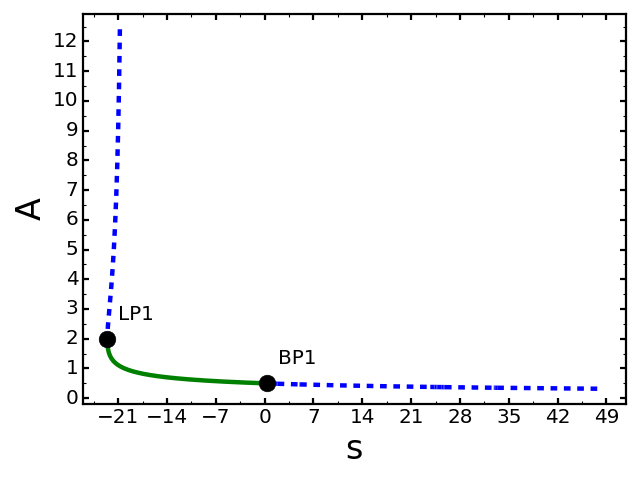

In [32]:
#modelBifCont2 = model6.bifurcation('s','A',plottingMethod='pyds')
modelBifCont2 = model6.bifurcation('s','A',plottingMethod='mumot')
#modelBifCont2 = model6.bifurcation('s','A',plottingMethod='mumot', initSV=[['A', 0.1], ['B', 0.9]])

In [33]:
modelBifCont1.showLogs()

Initial conditions chosen for state variables:  {'B': 0.9, 'A': 0.1}
Starting bifurcation analysis with parameters (Delta=10.0), (mu=10.0), at 2017-10-07 08:08:28.690053
Not converged:  [-0.2683528   1.38734017  4.84568243] 

BP Point found 
Special Points on curve:  [[-0.23439834105785093], [1.0706077680670038e-14], ['BP1']]


bar<ipywidgets.widgets.widget_string.HTML object at 0x116922a20>


<IPython.core.display.Javascript object>


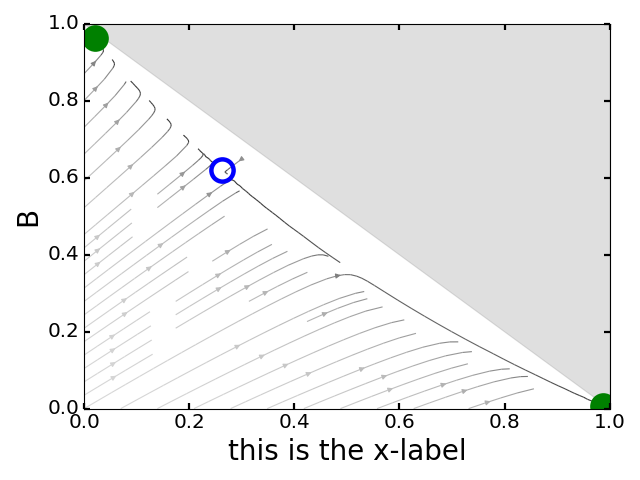

In [34]:
modelStreamCont1 = model4.stream('A', 'B',fontsize=25, xlab=r'this is the x-label', showFixedPoints=True)

In [36]:
modelStreamCont1.showLogs()

Starting 2d stream plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-10-07 08:09:31.173610
Fixed point1: {A: -0.862678806903202, B: -0.593011839542321} with eigenvalues: [17.5618647273097, 41.7474293006489]
Fixed point2: {A: 0.996040262912443, B: 0.00130709072640409} with eigenvalues: [-6.59068017459649, -38.5435464985543]
Starting 2d stream plot with parameters (Delta=7.5), (mu=10.0), (s=10.0), at 2017-10-07 08:10:05.128146
Fixed point1: {A: -0.841421465818821, B: -0.653912047847756} with eigenvalues: [40.0799195349685, 20.2038540563588]
Fixed point2: {A: 0.994489443428154, B: 0.00210859276342552} with eigenvalues: [-38.2116714274447, -5.60640548293847]
Starting 2d stream plot with parameters (Delta=6.9), (mu=10.0), (s=10.0), at 2017-10-07 08:10:32.916031
Fixed point1: {A: -0.836305212644789, B: -0.666275703819575} with eigenvalues: [39.6472489336100, 20.8155683323072]
Fixed point2: {A: 0.994006880887110, B: 0.00236205737394443} with eigenvalues: [-5.36869133504768, -38.

bar<ipywidgets.widgets.widget_string.HTML object at 0x116ffbf28>


<IPython.core.display.Javascript object>


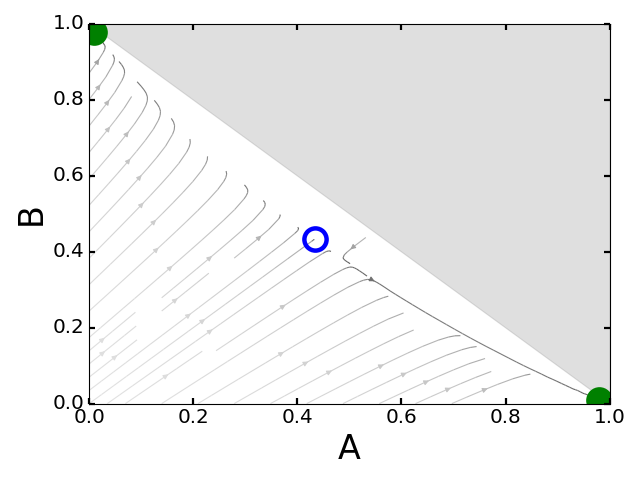

In [37]:
modelStreamCont2 = model6.stream('A', 'B')

In [38]:
modelStreamCont2.showLogs()

Starting 2d stream plot with parameters (s=10.0), (v=10.0), at 2017-10-07 08:11:01.295583
Fixed point1: {A: -0.769722927892837, B: -0.769722927892837} with eigenvalues: [36.0833756735702, 25.2944585578568]
Fixed point2: {A: 0.0102062294129596, B: 0.979793770587040} with eigenvalues: [-37.2781471969828, -2.52185280301723]
Fixed point3: {A: 0.433056261226171, B: 0.433056261226171} with eigenvalues: [-36.0833756735702, 1.23887477547660]
Fixed point4: {A: 0.979793770587040, B: 0.0102062294129596} with eigenvalues: [-37.2781471969828, -2.52185280301723]


bar<ipywidgets.widgets.widget_string.HTML object at 0x117a90080>


<IPython.core.display.Javascript object>


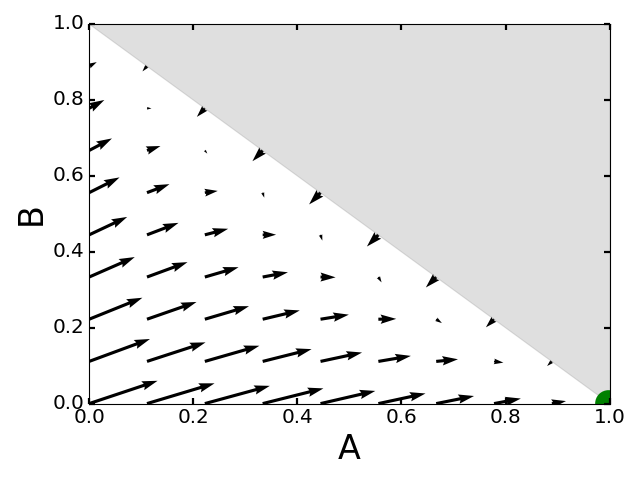

In [39]:
modelVectorCont1 = model4.vector('A', 'B', showFixedPoints=True)

In [40]:
modelVectorCont1.showLogs()

Starting 2d vector plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-10-07 08:11:34.265176
Fixed point1: {A: -0.862678806903202, B: -0.593011839542321} with eigenvalues: [17.5618647273097, 41.7474293006489]
Fixed point2: {A: 0.996040262912443, B: 0.00130709072640409} with eigenvalues: [-6.59068017459649, -38.5435464985543]


In [13]:
%%model
$
U -> A : g_1
U -> B : g_2
U -> C : g_3
A -> U : a_1
B -> U : a_2
C -> U : a_3
A + U -> A + A : r_1
B + U -> B + B : r_2
C + U -> C + C : r_3
A + B -> A + U : s
A + B -> B + U : s
A + C -> A + U : s
A + C -> C + U : s
B + C -> B + U : s
B + C -> C + U : s
$

<IPython.core.display.Latex object>

In [14]:
model7 = mmt.parseModel(In[13])

In [15]:
model8 = model7.substitute('U = N - A - B - C')

bar<ipywidgets.widgets.widget_string.HTML object at 0x110939da0>


<IPython.core.display.Javascript object>


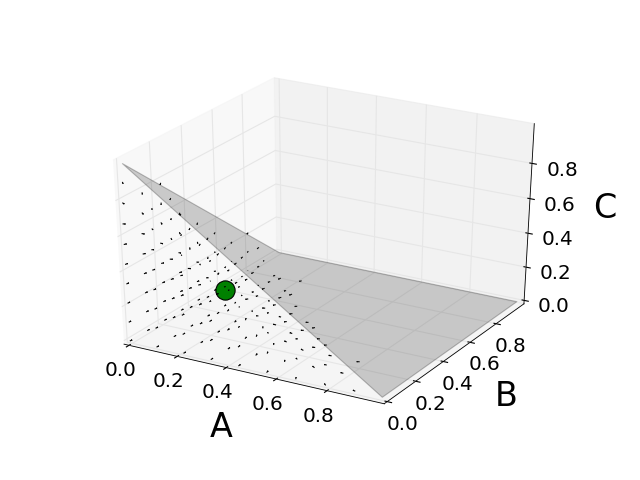

In [16]:
modelVectorCont2 = model8.vector('A', 'B', 'C')

In [17]:
modelVectorCont2.showLogs()

Starting 3d vector plot with parameters (a_{1}=10.0), (a_{2}=10.0), (a_{3}=10.0), (g_{1}=10.0), (g_{2}=10.0), (g_{3}=10.0), (r_{1}=10.0), (r_{2}=10.0), (r_{3}=10.0), (s=10.0), at 2017-10-07 08:04:41.008060
Fixed point1: {A: -0.838516480713450, C: -0.838516480713450, B: -0.838516480713450} with eigenvalues: [53.8516480713450, 33.5406592285380, 33.5406592285380]
Fixed point2: {A: 0.238516480713450, C: 0.238516480713450, B: 0.238516480713450} with eigenvalues: [-53.8516480713450, -9.54065922853800, -9.54065922853800]


<IPython.core.display.Javascript object>


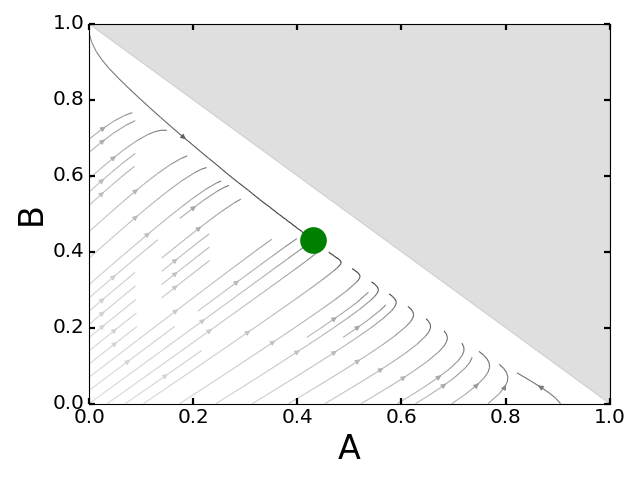

In [18]:
soloView1 = mmt.MuMoTstreamView(model6, None, 'A', 'B', params = [('s', 1), ('v', 2)])

In [19]:
model9 = model8.substitute('a_1 = a, a_2 = a, a_3 = a, g_1 = g, g_2 = g, g_3 = g, r_1 = r, r_2 = r, r_3 = r')

<IPython.core.display.Javascript object>


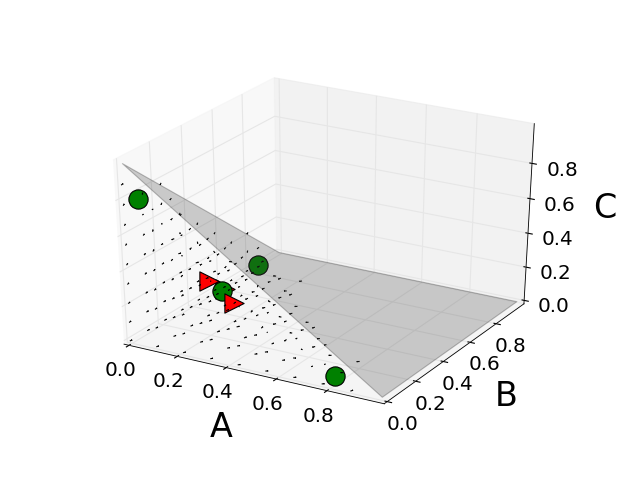

In [20]:
soloView2 = mmt.MuMoTvectorView(model9, None, 'A', 'B', 'C', params = [('s', 5), ('a', 1/2), ('r', 5), ('g', 1)])
#soloView2 = mmt.MuMoTvectorView(model9, None, 'A', 'B', 'C', params = [('s', 10), ('a', 10), ('r', 10), ('g', 10)], showFixedPoints=True)

In [21]:
soloView2.showLogs()

Starting 3d vector plot with parameters (s=5), (a=0.5), (r=5), (g=1), at 2017-10-07 08:04:53.990740
Fixed point1: {A: -0.172237484161567, C: -0.172237484161567, B: -0.172237484161567} with eigenvalues: [7.94474968323133, 7.94474968323133, 10.1118742080783]
Fixed point2: {A: 0.0333333333333333, C: 0.800000000000000, B: 0.0333333333333333} with eigenvalues: [-0.889201008602891, -10.7774656580638, -3.83333333333333]
Fixed point3: {A: 0.0333333333333333, C: 0.0333333333333333, B: 0.800000000000000} with eigenvalues: [-0.889201008602891, -10.7774656580638, -3.83333333333333]
Fixed point4: {A: 0.200000000000000, C: 0.300000000000000, B: 0.200000000000000} with eigenvalues: [-0.500000000000000, 0.123475382979799, -10.1234753829798]
Fixed point5: {A: 0.200000000000000, C: 0.200000000000000, B: 0.300000000000000} with eigenvalues: [-0.500000000000000, 0.123475382979799, -10.1234753829798]
Fixed point6: {A: 0.232237484161567, C: 0.232237484161567, B: 0.232237484161567} with eigenvalues: [-10.111

bar<ipywidgets.widgets.widget_string.HTML object at 0x11436f240>


<IPython.core.display.Javascript object>


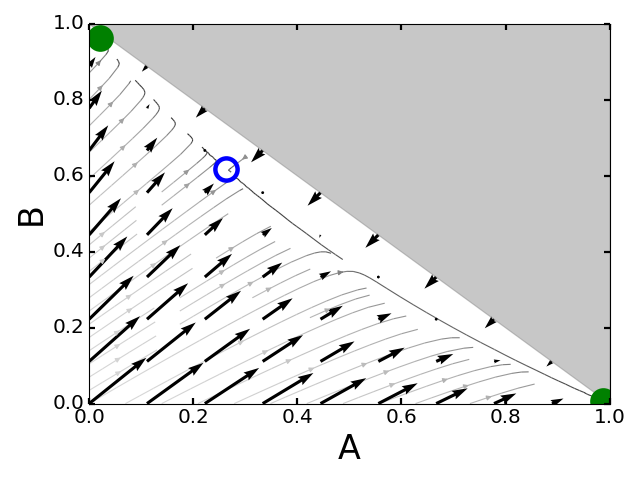

In [22]:
multiController1 = mmt.MuMoTmultiController([model4.stream('A', 'B', silent = True, showFixedPoints=False), 
                                             model4.vector('A', 'B', silent = True)], shareAxes = True)

In [23]:
multiController1.showLogs()

Starting 2d stream plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-10-07 08:04:59.643723
Starting 2d vector plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-10-07 08:05:37.105096
Fixed point1: {A: -0.862678806903202, B: -0.593011839542321} with eigenvalues: [17.5618647273097, 41.7474293006489]
Fixed point2: {A: 0.996040262912443, B: 0.00130709072640409} with eigenvalues: [-6.59068017459649, -38.5435464985543]
Starting 2d stream plot with parameters (Delta=2.2), (mu=10.0), (s=10.0), at 2017-10-07 08:05:44.992391
Starting 2d vector plot with parameters (Delta=2.2), (mu=10.0), (s=10.0), at 2017-10-07 08:06:19.173446
Fixed point1: {A: -0.793248928085504, B: -0.742672833183215} with eigenvalues: [24.6921732398679, 36.5978812746215]
Fixed point2: {A: 0.0201773246031218, B: 0.962511877832081} with eigenvalues: [-1.49292574616157, -36.9805239833465]
Fixed point3: {A: 0.263100988252740, B: 0.619041790257202} with eigenvalues: [1.02866029681217, -36.1252861956569]


bar<ipywidgets.widgets.widget_string.HTML object at 0x114ae2e10>


<IPython.core.display.Javascript object>


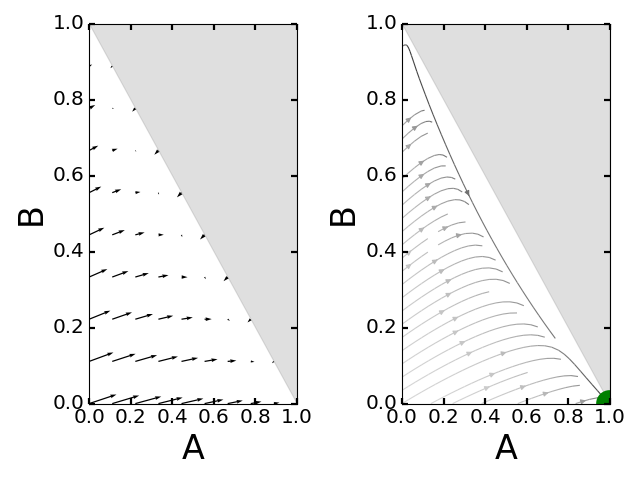

In [24]:
multiController2 = mmt.MuMoTmultiController([model4.vector('A', 'B', silent = True, showFixedPoints=False), model4.stream('A', 'B', silent = True)])
#multiController2 = mmt.MuMoTmultiController([model4.vector('A', 'B', silent = True), model4.stream('A', 'B', silent = True), model4.bifurcation('s', 'A', silent = True)])

In [25]:
multiController2.showLogs()

Starting 2d vector plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-10-07 08:06:31.148166
Starting 2d stream plot with parameters (Delta=10.0), (mu=10.0), (s=10.0), at 2017-10-07 08:06:57.409177
Fixed point1: {A: -0.862678806903202, B: -0.593011839542321} with eigenvalues: [17.5618647273097, 41.7474293006489]
Fixed point2: {A: 0.996040262912443, B: 0.00130709072640409} with eigenvalues: [-6.59068017459649, -38.5435464985543]


In [26]:
multiController3 = mmt.MuMoTmultiController([model4.stream('A', 'B', silent = True), 
                                             model4.vector('A', 'B', silent = True)], shareAxes = True, silent = True)

bar<ipywidgets.widgets.widget_string.HTML object at 0x1146045f8>


<IPython.core.display.Javascript object>


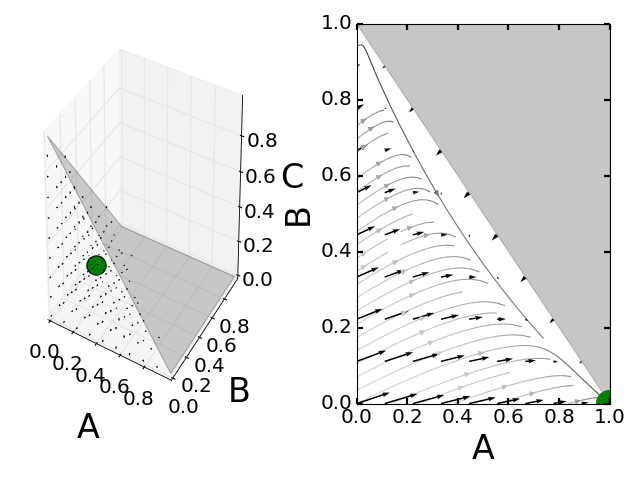

In [27]:
multiController4 = mmt.MuMoTmultiController([model9.vector('A', 'B', 'C', silent = True, showFixedPoints=True), 
                                             multiController3])

In [28]:
multiController4.showLogs()

Starting 3d vector plot with parameters (Delta=10.0), (a=10.0), (g=10.0), (mu=10.0), (r=10.0), (s=10.0), at 2017-10-07 08:07:23.062926
Fixed point1: {A: -0.838516480713450, C: -0.838516480713450, B: -0.838516480713450} with eigenvalues: [53.8516480713450, 33.5406592285380, 33.5406592285380]
Fixed point2: {A: 0.238516480713450, C: 0.238516480713450, B: 0.238516480713450} with eigenvalues: [-53.8516480713450, -9.54065922853800, -9.54065922853800]
Starting 2d stream plot with parameters (Delta=10.0), (a=10.0), (g=10.0), (mu=10.0), (r=10.0), (s=10.0), at 2017-10-07 08:07:48.946733
Fixed point1: {A: -0.862678806903202, B: -0.593011839542321} with eigenvalues: [17.5618647273097, 41.7474293006489]
Fixed point2: {A: 0.996040262912443, B: 0.00130709072640409} with eigenvalues: [-6.59068017459649, -38.5435464985543]
Starting 2d vector plot with parameters (Delta=10.0), (a=10.0), (g=10.0), (mu=10.0), (r=10.0), (s=10.0), at 2017-10-07 08:08:13.685240
Fixed point1: {A: -0.862678806903202, B: -0.593